In [2]:
import qiskit
from qiskit import QuantumCircuit, transpile, transpiler
from qiskit.visualization import plot_histogram

import qiskit_aer
from qiskit_aer import AerSimulator, noise, jobs, backends

import qiskit_ibm_runtime
from qiskit_ibm_runtime.fake_provider import FakeVigoV2, FakeAthensV2

In [3]:
NUM_SHOTS = 10**4
NUM_QUBITS = 4
fakeVigo2_backend = FakeVigoV2()
fakeAthensV2_backend = FakeAthensV2()


In [4]:
def circuit_ghz_4q_cnot0():
    circ = QuantumCircuit(4)
    circ.h(0)
    circ.cx(0,1)
    circ.cx(0,2)
    circ.cx(0,3)

    circ.measure_all()

    return circ
    
def custom_ghz(num_q: int, hammard_on: int, single_qubit_cnot=True):
    
    assert hammard_on < num_q, f"Qubit chosen to have hammard gate {hammard_on} greater than number of available qubits {num_q} "
    circ = QuantumCircuit(num_q)
    circ.h(hammard_on)
    if single_qubit_cnot:
        for i in range(num_q):
            if not i == hammard_on:
                circ.cx(hammard_on, i)

    else:
        for i in range(num_q-1):
            c = (hammard_on+i) % num_q
            t = (hammard_on+i+1) % num_q
            circ.cx(c,t)

    circ.measure_all()

    return circ




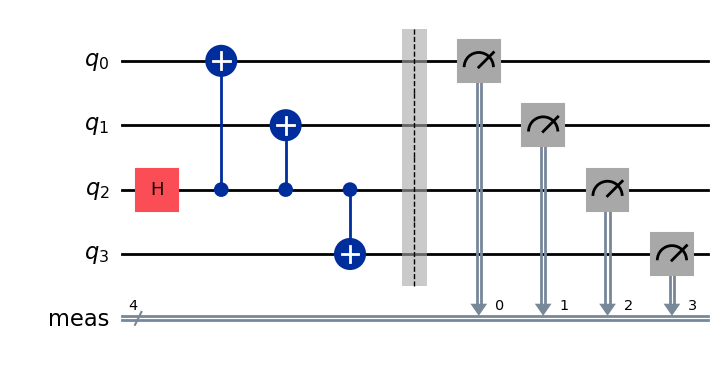

In [5]:
# circ = circuit_ghz_4q_cnot0()
circ = custom_ghz(num_q=NUM_QUBITS, hammard_on=NUM_QUBITS//2)
circ.draw('mpl')

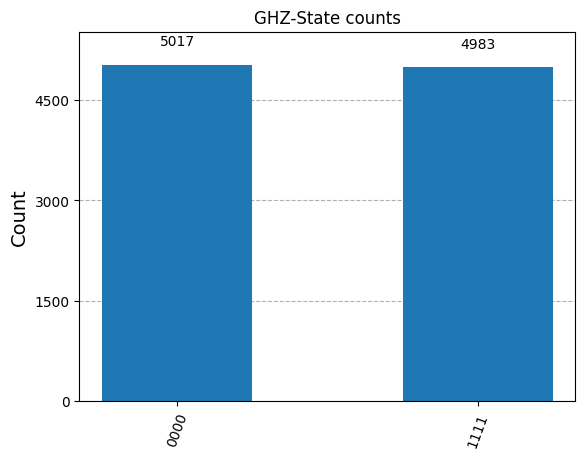

In [6]:
ideal_sim = AerSimulator()
transpiled_circ = transpile(circ, ideal_sim)
result = ideal_sim.run(transpiled_circ, shots=NUM_SHOTS).result()
counts = result.get_counts(transpiled_circ)
plot_histogram(counts, title='GHZ-State counts')

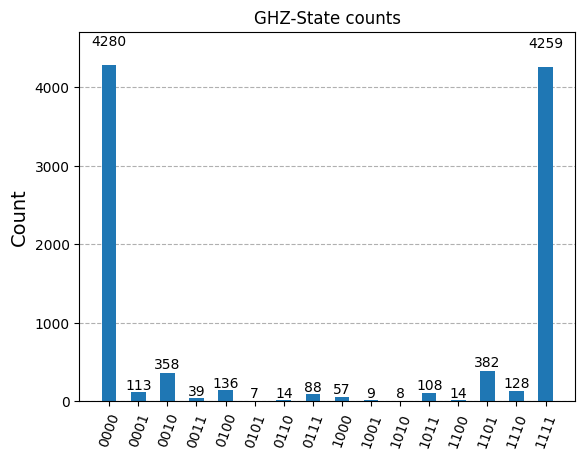

In [7]:
noisy_sim = AerSimulator.from_backend(fakeVigo2_backend)

transpiled_circ = transpile(circ, noisy_sim)
result = noisy_sim.run(transpiled_circ, shots=NUM_SHOTS).result()
counts = result.get_counts(transpiled_circ)
plot_histogram(counts, title='GHZ-State counts')

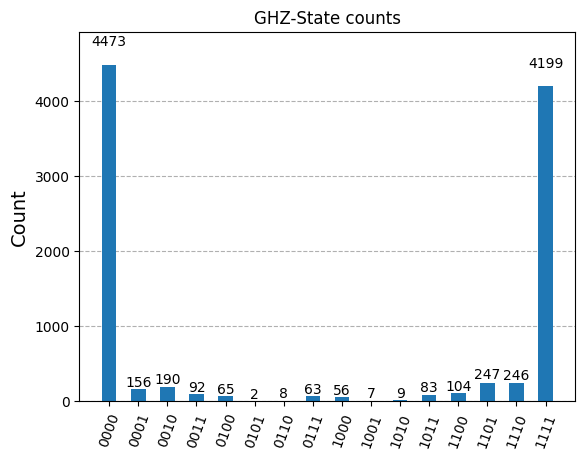

In [8]:
noisy_sim = AerSimulator.from_backend(fakeAthensV2_backend)

transpiled_circ = transpile(circ, noisy_sim)
result = noisy_sim.run(transpiled_circ, shots=NUM_SHOTS).result()
counts = result.get_counts(transpiled_circ)
plot_histogram(counts, title='GHZ-State counts')